# CityBikes

Send a request to CityBikes for the city of your choice. 

For this part, we will work with an API that you have not seen before: CityBikes

Citybikes is an API that provides bike sharing data for apps, research and projects. CityBikes supports more than 400 cities and the Citybikes API is an interesting dataset for building bike-sharing transportation projects.

Your tasks are as follows:

Explore the structure of the API, query the API and understand the data returned.
Choose a city covered by the CityBikes API and retrieve all available bike stations in that city.
For each bike station, use the API to call the latitude, longitude and number of bikes.
Parse the JSON object into a Pandas dataframe.
Complete the city_bikes.ipynb notebook to demonstrate how you executed the tasks above.

# Explore the structure of the API

##### Citybikes API endpoints:

http://api.citybik.es/v2/networks contains json, and starts with a "dictionary" of networks, then a "list" of companies. each company will have a city and country property. I used this endpoint to find a network in the city of San Francisco. I chose SF because it is known to be a hilly city and I wanted to investigate the affects of hilliness to cycle infastructure.

http://api.citybik.es/v2/networks/network_id contains json, and starts with a dictionary holding name of the network and a list of stations.

After deciding on SF's network Bay Wheels I then got all the stations in Bay Wheel's network


{
  "networks": [
    {
        "company": "JCDecaux", 
        "href": "/v2/networks/velib", <--- network API endpoint
        "location": {
          "latitude": 48.856612, 
          "city": "Paris", 
          "longitude": 2.352233, 
          "country": "FRA"
        }, 
        "name": "Vélib'", 
        "id": "velib"
    },
    {...}
  ]
}
http://api.citybik.es/v2/networks/network_id
{
  "network": {
    "name": "Vélib'", 
    "stations": [
      {
          "name": "00903 - QUAI MAURIAC  / PONT DE BERCY",   /   UTC Zulu timestamp of the last time
          "timestamp": "2014-04-14T12:10:17.622Z",  <-------/ the station was updated on our systems
          "longitude": 2.374340554605615,                       
          "free_bikes": 1,   <-------------------------- Available bikes
          "latitude": 48.83713368945151, 
          "empty_slots": 19,  <------------------------- Empty spaces
          "id": "f5a551a87eec15155d6409fe9d0ff8e2" <---- Unique id for this station
      },
      {...}
    ], 
    "company": "JCDecaux",           |
    "href": "/v2/networks/velib",       |        Redundant Information
    "location": {                    |
      "latitude": 48.856612,         |    Just so you know where you are
      "city": "Paris",               |---      with less requests
      "longitude": 2.352233,         | 
      "country": "FRA"               |    This can be filtered by passing
    },                               |      ?fields=stations to the URI
    "id": "velib"                    |
  }
}

# Query the API and understand the data returned

As seen from the json viewer below, for each station there is is lat/long location data, number of bikes available at the station "free_bikes", number of empty slots "empty_slots", name of the station, and timestamp of when the data was collected. There is also infomation on ebikes. As well as less useful information.

The data on ebikes will be important for my research as it may be relevant to hilliness

- **empty_slots: Number of available empty parking slots for bikes at a location.**
- **free_bikes: Number of bikes available for rent at a location.**
- **id: Unique identifier for the location or station.**
- **latitude: The latitude coordinate of the location.**
- **longitude: The longitude coordinate of the location**.
- name: Name or label of the location or station.
- **timestamp: Date and time when the data was recorded.**
##### Under 'extra' nest:
- **ebikes: Number of extra e-bikes available at the location.**
- has_ebikes: Indicates whether the location has e-bikes available (e.g., 1 for yes, 0 for no).
- last_updated: Timestamp indicating when the extra information was last updated.
- payment: Payment-related information for the location (possibly payment options).
- payment-terminal: Information about payment terminals at the location.
- rental_uris_android: Rental URIs for Android devices (possibly for mobile apps).
- rental_uris_ios: Rental URIs for iOS devices (possibly for mobile apps).
- renting: Possibly information about the renting process at the location. All entries are '1' 
- returning: Possibly information about the returning process at the location. All entries are '1'
- **slots: Number of available empty e-bike parking slots for bikes for the location.**
- uid: Unique identifier or user ID related to the "extra"/ebike location.
- address: Address or location details for the station, often NA

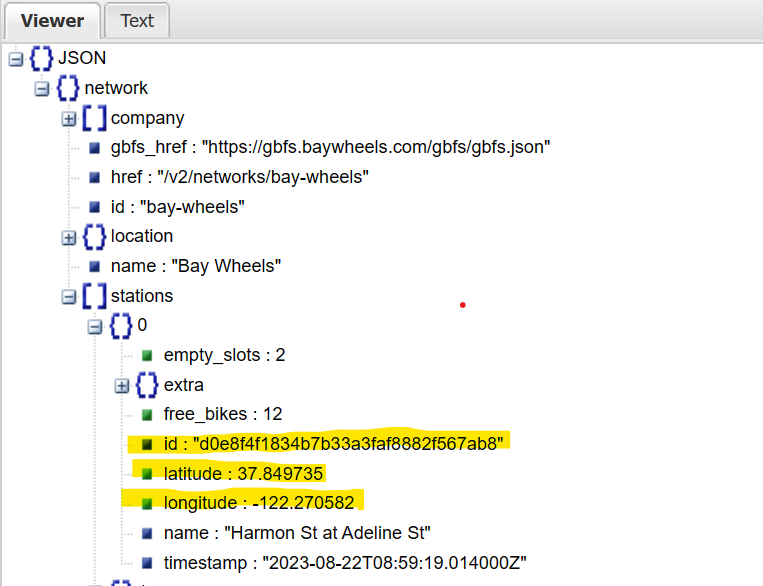

# Retrieve all available bike stations in that city for each bike station

In [2]:
# Import necessary libraries
import requests  # To make HTTP requests
import json      # To work with JSON data
import pandas as pd  # To work with data frames

# Define the API URL for San Francisco City Bikes Network
api_url = 'http://api.citybik.es/v2/networks/bay-wheels'

# Send an HTTP GET request to the API URL
response = requests.get(api_url)

# Check if the response status code is 200 (HTTP OK)
if response.status_code == 200:
    # If the response is successful (status code 200), parse the JSON data
    data = response.json()
else:
    # If there's an error (status code other than 200), print an error message
    print(f"Error: {response.status_code} - {response.text}")


# Parse through the response 
### Get the details for the bike stations

In [4]:
# Create an empty list to store station information
stations_list = []

# Iterate through each station in the 'stations' list within the json and add station info to my own list
for station in data['network']['stations']:
    stations_list.append(station)  # Append the station to the stations_list


print(stations_list[0:2])

[{'empty_slots': 1, 'extra': {'ebikes': 0, 'has_ebikes': True, 'last_updated': 1693929840, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://sfo.lft.to/lastmile_qr_scan', 'ios': 'https://sfo.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 15, 'uid': 'fd89514c-f878-4cd5-8113-8e5beead44de'}, 'free_bikes': 13, 'id': 'd0e8f4f1834b7b33a3faf8882f567ab8', 'latitude': 37.849735, 'longitude': -122.270582, 'name': 'Harmon St at Adeline St', 'timestamp': '2023-09-05T16:05:04.054000Z'}, {'empty_slots': 4, 'extra': {'ebikes': 0, 'has_ebikes': True, 'last_updated': 1693929781, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://sfo.lft.to/lastmile_qr_scan', 'ios': 'https://sfo.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 11, 'uid': 'd12ba265-5bfe-4a00-a19a-a7299822bd65'}, 'free_bikes': 6, 'id': '983514094dd808b1604da2dcfc2d09af', 'latitude': 37.33618830029063, 'longitude':

# Putting parsed results into a DataFrame.

In [6]:
#normalizes JSON structure so there is an entry per station, and converts into a dataframe
stations_df=pd.json_normalize(stations_list, sep='_') #specifies the separator character to use when creating column names for nested JSON objects
stations_df.head(5)

,empty_slots,free_bikes,id,latitude,longitude,name,timestamp,extra_ebikes,extra_has_ebikes,extra_last_updated,extra_payment,extra_payment-terminal,extra_rental_uris_android,extra_rental_uris_ios,extra_renting,extra_returning,extra_slots,extra_uid,extra_address
0,1,13,d0e8f4f1834b7b33a3faf8882f567ab8,37.849735,-122.270582,Harmon St at Adeline St,2023-09-05T16:05:04.054000Z,0,True,1693929840,"[key, creditcard]",True,https://sfo.lft.to/lastmile_qr_scan,https://sfo.lft.to/lastmile_qr_scan,1,1,15,fd89514c-f878-4cd5-8113-8e5beead44de,NaN
1,4,6,983514094dd808b1604da2dcfc2d09af,37.336188,-121.889277,Fountain Alley at S 2nd St,2023-09-05T16:05:03.587000Z,0,True,1693929781,"[key, creditcard]",True,https://sfo.lft.to/lastmile_qr_scan,https://sfo.lft.to/lastmile_qr_scan,1,1,11,d12ba265-5bfe-4a00-a19a-a7299822bd65,NaN
2,15,8,da17603652106fda93da4e255a5b0a22,37.322125,-121.881090,Oak St at 1st St,2023-09-05T16:05:04.033000Z,0,True,1693929846,"[key, creditcard]",True,https://sfo.lft.to/lastmile_qr_scan,https://sfo.lft.to/lastmile_qr_scan,1,1,23,0fd9a51c-67ac-4048-b531-bff644b82f47,NaN
3,8,6,7a21c92b3b4cd2f7759107b4fdebf869,37.323678,-121.874119,Bestor Art Park,2023-09-05T16:05:03.786000Z,1,True,1693929809,"[key, creditcard]",True,https://sfo.lft.to/lastmile_qr_scan,https://sfo.lft.to/lastmile_qr_scan,1,1,15,46b4ef45-b06b-40eb-9fdf-9bc8ff104a4f,NaN
4,21,5,ce34d38fb230a23c1ced12d1e16df294,37.325998,-121.877120,5th St at Virginia St,2023-09-05T16:05:03.979000Z,0,True,1693929850,"[key, creditcard]",True,https://sfo.lft.to/lastmile_qr_scan,https://sfo.lft.to/lastmile_qr_scan,1,1,27,bb54f5c8-5578-4167-9599-8e55154de4fd,NaN


In [14]:
#creating an empty dictionary of station_ids for later purpose.
stations_to_venues_dict_empty={}
for an_id in stations_df['id']:
    stations_to_venues_dict_empty[an_id]=[]

for i, key_val_pair in enumerate(stations_to_venues_dict_empty.items()):
    if i < 6:
        print(key_val_pair)

('d0e8f4f1834b7b33a3faf8882f567ab8', [])
('983514094dd808b1604da2dcfc2d09af', [])
('da17603652106fda93da4e255a5b0a22', [])
('7a21c92b3b4cd2f7759107b4fdebf869', [])
('ce34d38fb230a23c1ced12d1e16df294', [])
('a3b487ad4ac93ab3e9f9654f87ed8c1e', [])


# Saving dataframes to csv files 

In [ ]:
stations_df.to_csv('initial_stations_df1.csv', index=False)

In [6]:
stations_df.to_csv('Aug10_stations_df.csv', index=False)

In [13]:
stations_empty_df=pd.DataFrame(stations_to_venues_dict_empty)

In [ ]:
stations_df.to_csv('initial_stations_df1.csv', index=False)

In [15]:
stations_empty_df.to_csv('stations_empty_df.csv', index=False)